In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ipynb.fs.defs.tdc_data_analysis import line_hist

# Analysis of Centroided Data

In [3]:
background= pd.read_csv('background11.csv',index_col=False)
background.delta_t = background.delta_t*1e9

In [4]:
signal = pd.read_csv('signal_tentative8.csv',index_col=False)
signal.delta_t = signal.delta_t*1e9

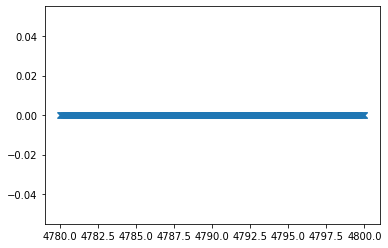

In [5]:
x_sg_t,y_sg_t = line_hist(signal.delta_t*1e9,normalized=False,bins=np.linspace(4780,4800,1000),linestyle='None')

<AxesSubplot:xlabel='x', ylabel='y'>

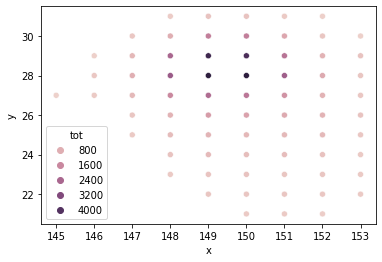

In [19]:
sns.scatterplot(data=dfdd

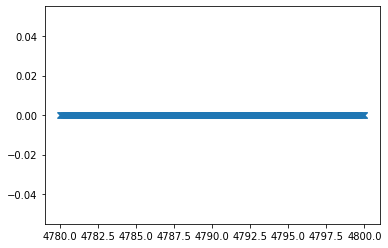

In [6]:
x_bg_t,y_bg_t = line_hist(background.delta_t*1e9,normalized=False,bins=np.linspace(4780,4800,1000),
                          linestyle='None')

In [7]:
print(len(signal),len(background))

620000 580000


In [10]:
145/580 # many electron rejection/ len(background)

0.25

In [11]:
155/620 # many electron rejection/ len(signal)

0.25

We multiply the signal by 1.25 because ??? 

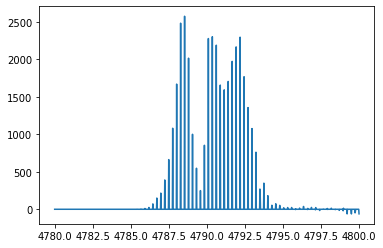

In [73]:
plt.plot(x_bg_t,1.25*y_sg_t-y_bg_t,linestyle='-')

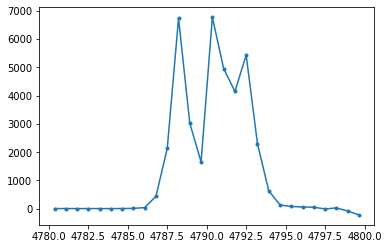

In [56]:
plt.plot(x_bg_t,1.25*y_sg_t-y_bg_t,linestyle='-',marker='.')

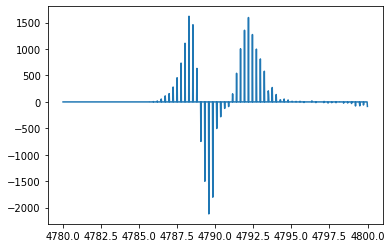

In [6]:
plt.plot(x_bg_t,y_sg_t-y_bg_t)

In [12]:
def get_fit_pts(xarr,yarr,threshold=300):
    '''Thresholds the binned data and returns the thresholded data '''
    mask = (yarr>threshold)
    xarr = xarr[mask]
    yarr = yarr[mask]
    xarr = xarr
    plt.plot(xarr,yarr)
    plt.show()
    return xarr,yarr

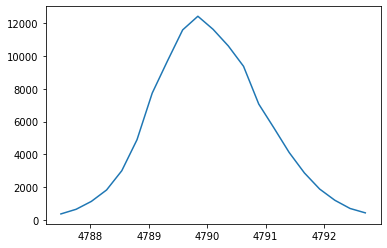

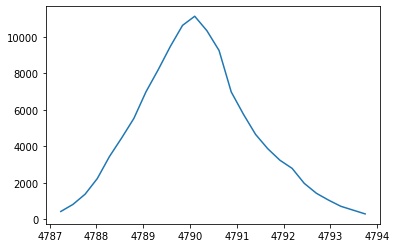

In [8]:
x_bg_t, y_bg_t = get_fit_pts(x_bg_t,y_bg_t)
x_sg_t, y_sg_t = get_fit_pts(x_sg_t,y_sg_t)

In [24]:
from scipy.optimize import curve_fit

In [25]:
def fit_f(x,m1,s1,a1):   # gaussian fit
    y = a1*np.exp(-(x-m1)**2/s1**2)
    return y
def plot_f(m1,s1,a1):
    x_tmp = np.linspace(4780,4800,5000)
    y_tmp = fit_f(x_tmp,m1,s1,a1)
    return y_tmp

In [26]:
def fit_to_curve(x_bg_t,y_bg_t,a0):    # fits and returns fit function y's
    fit_param_bg, fit_cov_bg =curve_fit(fit_f,x_bg_t,y_bg_t,p0=[-2, 4790, a0])
    print('Mean1:%f\n Std1: %f\n Amp1: %f\n' % tuple(fit_param_bg),'\n')
    print(fit_cov_bg)
    y_f = plot_f(*fit_param_bg)
    plt.plot(x_bg_t,y_bg_t,linestyle='None',marker='x')
    plt.show()
    return y_f

Mean1:4789.982236
 Std1: 1.313529
 Amp1: 12093.965041
 

[[ 3.47297216e-04 -6.02504711e-07  2.53276483e-03]
 [-6.02504711e-07  6.98208879e-04 -3.21218899e+00]
 [ 2.53276483e-03 -3.21218899e+00  4.42003241e+04]]


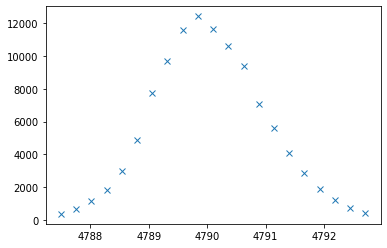

In [27]:
y_bg_fit =fit_to_curve(x_bg_t,y_bg_t,12000)

Mean1:4790.045735
 Std1: -1.649232
 Amp1: 10304.826595
 

[[8.85101736e-04 6.91082950e-06 1.85085675e-02]
 [6.91082950e-06 1.80096520e-03 5.61076959e+00]
 [1.85085675e-02 5.61076959e+00 5.19373217e+04]]


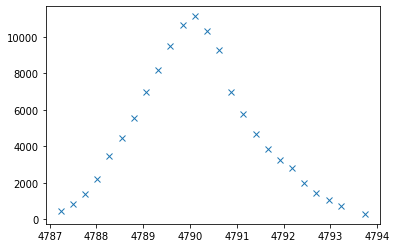

In [28]:
y_sg_fit = fit_to_curve(x_sg_t,y_sg_t,12000)

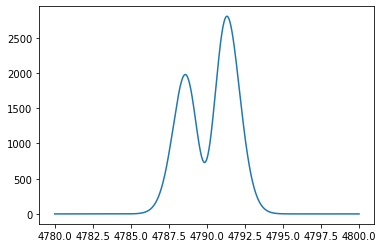

In [59]:
plt.plot(np.linspace(4780,4800,5000),y_sg_fit*1.25-y_bg_fit)

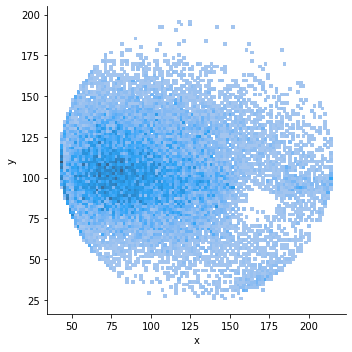

In [79]:
sns.displot(data=signal[signal['delta_t']*1e9<4795]-0*background[background['delta_t']*1e9<4795]
            ,x='x',y='y',bins=100)

In [14]:
signal_th = signal[(signal['delta_t']<4795 ) & (signal['delta_t']>4785) ]
background_th = background[(background['delta_t']<4795 ) &( background['delta_t']>4785) ]

In [18]:
def to_plot_2dhist(var1,var2,bin1=None,bin2=None,signal_factor=1.25,full_output=False):
    global signal_th,background_th
    def choose_bins(var):
        if var in ['x','y']:
            bins = np.linspace(0,255,100)
        if var == 'delta_t':
            bins = np.linspace(4780,4800,30)
        return bins
    
    if bin1 is None:
        bin1 = choose_bins(var1)
    if bin2 is None:
        bin2 = choose_bins(var2)
        
    signal_hist = np.histogram2d(signal_th[var1],
                                 signal_th[var2],
                                 bins=(bin1,bin2))
    background_hist = np.histogram2d(background_th[var1],
                                     background_th[var2],
                                     bins=(bin1,bin2))
    if full_output:
        return signal_factor*signal_hist[0]-background_hist[0], signal_factor[1:]
    return signal_factor*signal_hist[0].T-background_hist[0].T

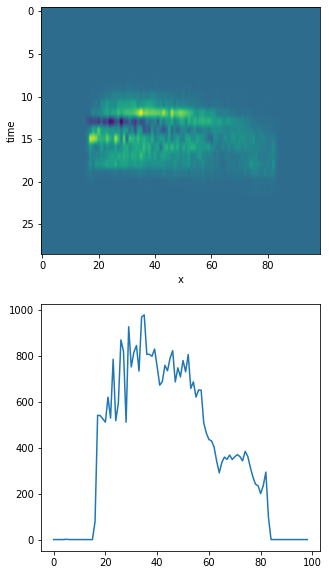

In [25]:
fig = plt.figure(figsize=(5,10))
fig.add_subplot(211)
plt.imshow(to_plot_2dhist('x','delta_t'),aspect='auto')
plt.xlabel('x')
plt.ylabel('time')

fig.add_subplot(212)
plt.plot(to_plot_2dhist('x','delta_t').sum(axis=0))

plt.show()

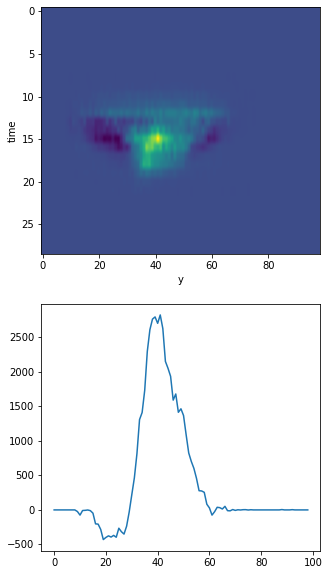

In [31]:
fig = plt.figure(figsize=(5,10))
fig.add_subplot(211)
plt.imshow(to_plot_2dhist('y','delta_t'),aspect='auto')
plt.xlabel('y')
plt.ylabel('time')

fig.add_subplot(212)
plt.plot(to_plot_2dhist('y','delta_t').sum(axis=0))

plt.show()

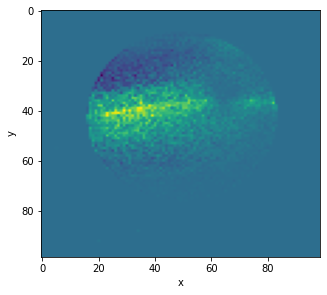

In [33]:
fig = plt.figure(figsize=(5,10))
fig.add_subplot(211)
plt.imshow(to_plot_2dhist('x','y'),aspect='auto')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

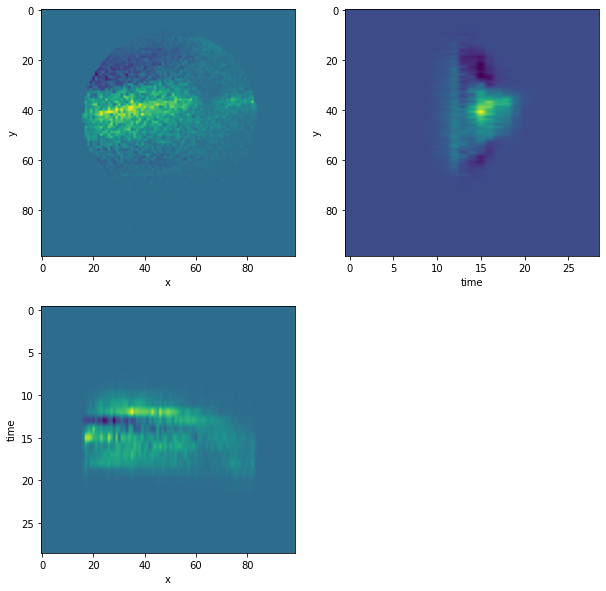

In [34]:

fig = plt.figure(figsize=(10,10))


fig.add_subplot(221)




plt.imshow(to_plot_2dhist('x','y'),aspect='auto')
plt.xlabel('x')
plt.ylabel('y')


fig.add_subplot(223)



plt.imshow(to_plot_2dhist('x','delta_t'),aspect='auto')
plt.xlabel('x')
plt.ylabel('time')


fig.add_subplot(222)


plt.imshow(to_plot_2dhist('delta_t','y'),aspect='auto')
plt.xlabel('time')
plt.ylabel('y')


plt.show()

<IPython.core.display.Javascript object>


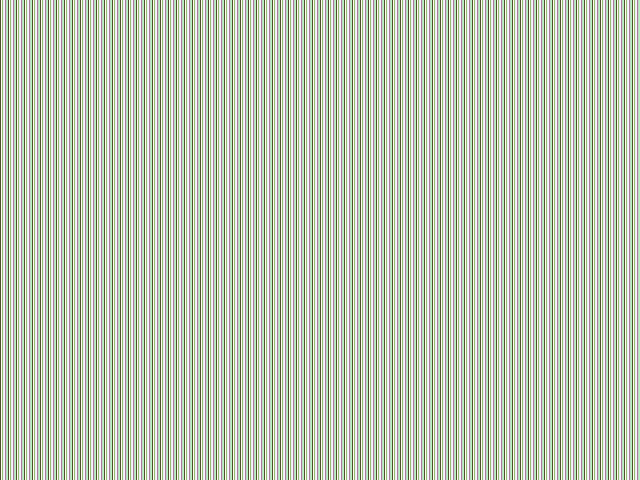

In [235]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
df = batches[(batches['delta_t']<4800) & (batches['delta_t']>4785)]
x = df['x']
y = df['y']
z = df['delta_t']

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("t")

ax.scatter(x, y, z)
plt.show()

# Comparing Center of Mass Centroiding and Max Centroiding

In [35]:
df = pd.read_csv('preprocessed11.csv')

In [37]:
df.head()

,toa,tot,x,y,tdc1,tdc2,batch
0,0.003464,100,177,44,0.003382,0.003465,0
1,0.003464,175,175,43,0.003382,0.003465,0
2,0.003464,350,179,43,0.003382,0.003465,0
3,0.003464,150,181,40,0.003382,0.003465,0
4,0.003464,525,176,43,0.003382,0.003465,0


In [79]:
def max_centroid(batch):
    max_ind = batch.tot.argmax()
    x = batch.iloc[max_ind].x
    y = batch.iloc[max_ind].y
    return np.array([x,y])

In [80]:
def com_centroid(batch):
    x = np.array(batch.x* batch.tot).sum()/batch.tot.sum()
    y = np.array(batch.y* batch.tot).sum()/batch.tot.sum()
    return np.array([x,y])

In [47]:
max_centroid(batch)

(177.0, 41.0)

In [52]:
com_centroid(batch)

(177.43805309734512, 40.542983565107455)

In [65]:
batch.tot.max()

4950

In [66]:
batch.tot.argmax()

65

In [68]:
batch.iloc[65]

toa         0.006212
tot      4950.000000
x         149.000000
y          40.000000
tdc1        0.006203
tdc2        0.006212
batch       1.000000
Name: 115, dtype: float64

In [114]:
def plot_centroids(batch_num):
    global df

    def plot_single(batch_num):
        batch = df[df['batch'] ==batch_num]
        plt.scatter(*max_centroid(batch),marker='s',color='red')
        plt.scatter(*com_centroid(batch),marker='s',color='blue')
        sns.scatterplot(data=batch,x='x',y='y',hue='tot')
        print(np.linalg.norm(max_centroid(batch)-com_centroid(batch)))
        plt.show()
        print('-----')
    if type(batch_num)==list:
        for num in batch_num:
            plot_single(num)
    elif type(batch_num) == int:
        plot_single(batch_num)
    


In [96]:
def dist_centroids(batch):
    return np.linalg.norm(max_centroid(batch)-com_centroid(batch))

In [98]:
dist_df=df.groupby('batch').apply(dist_centroids)

In [134]:
(dist_df>2).sum()

62

<AxesSubplot:>

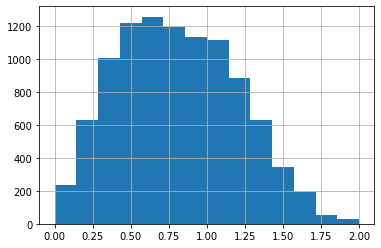

In [143]:
dist_df.hist(bins=np.linspace(0,2,15))

<AxesSubplot:>

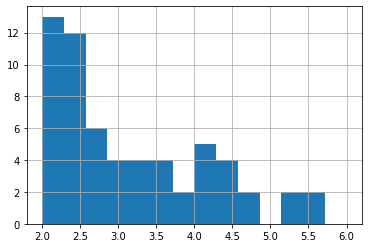

In [140]:
dist_df[dist_df>2].hist(bins=np.linspace(2,6,15))

In [105]:
dist_df.describe()

count    10000.000000
mean         0.825848
std          0.443154
min          0.000000
25%          0.501959
50%          0.794018
75%          1.105325
max          6.822784
dtype: float64

In [141]:
max_dist_list = list(dist_df.sort_values(ascending=False).index[60:100])

In [144]:
pathological_list= list(dist_df.sort_values(ascending=False).index[:40])

In [146]:
#plot_centroids(max_dist_list)    # removed so that file is smaller

In [147]:
#plot_centroids(pathological_list)   # removed so that file is smaller